In [291]:
import pandas as pd

In [292]:
train=pd.read_csv('../train.csv')
test=pd.read_csv('../test.csv')
sub=pd.read_csv('../sample_submission.csv')
age=pd.read_csv('../age_gender_info.csv')
train.shape, test.shape, sub.shape, age.shape

((2952, 15), (1022, 14), (150, 2), (16, 23))

In [293]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [294]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [295]:
train['임대료'].value_counts()

-         21
390000    19
79980     18
100920    16
167230    15
          ..
163000     1
23950      1
104180     1
65950      1
78330      1
Name: 임대료, Length: 995, dtype: int64

In [296]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

### 결측치

In [297]:
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [298]:
train.loc[train['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


In [299]:
train['임대건물구분'].unique()

array(['아파트', '상가'], dtype=object)

In [300]:
train['공급유형'].unique()

array(['국민임대', '공공임대(50년)', '영구임대', '임대상가', '공공임대(10년)', '공공임대(분납)',
       '장기전세', '공공분양', '행복주택', '공공임대(5년)'], dtype=object)

### 1.자격유형

In [301]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [302]:
grouped=test.groupby(['단지코드','임대건물구분','지역','공급유형'])
group1=grouped.get_group(('C2411','아파트','경상남도','국민임대'))
group2=grouped.get_group(('C2253','아파트','강원도','영구임대'))
print(group1)
print(group2)

      단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
193  C2411   962    아파트  경상남도  국민임대  39.43        56  25.0    A  11992000   
194  C2411   962    아파트  경상남도  국민임대  39.72       336  25.0    A  11992000   
195  C2411   962    아파트  경상남도  국민임대  39.82       179  25.0    A  11992000   
196  C2411   962    아파트  경상남도  국민임대  46.90       240  25.0  NaN  71950000   
197  C2411   962    아파트  경상남도  국민임대  51.93       150  25.0    A  21586000   

        임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  
193  100720                           0.0                 2.0    840.0  
194  100720                           0.0                 2.0    840.0  
195  100720                           0.0                 2.0    840.0  
196   37470                           0.0                 2.0    840.0  
197  171480                           0.0                 2.0    840.0  
      단지코드  총세대수 임대건물구분   지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형    임대보증금    임대료  \
258  C2253  1161  

In [303]:
test.loc[196,'자격유형']='A'
test.loc[258,'자격유형']='C'

In [304]:
test['자격유형'].isnull().sum()

0

In [305]:
train['자격유형'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [306]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5,
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10,
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }
train['자격유형']=train['자격유형'].map(mapping).astype(int)
test['자격유형']=test['자격유형'].map(mapping).astype(int)

### 2.도보 10분거리 내 버스정류장 수_qcut

In [307]:
train.loc[train['도보 10분거리 내 버스정류장 수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,1,46000000,456000,NaN,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,1,57000000,462000,NaN,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,1,57000000,462000,NaN,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,1,57000000,462000,NaN,NaN,1066.0,855.0


In [308]:
train['도보 10분거리 내 버스정류장 수']=train['도보 10분거리 내 버스정류장 수'].fillna(0.0)

In [309]:
train['도보 10분거리 내 버스정류장 수'].isnull().sum()

0

In [310]:
train['도보 10분거리 내 버스정류장 수'].value_counts()

2.0     780
3.0     776
4.0     493
1.0     270
5.0     164
6.0     156
8.0      99
10.0     80
7.0      65
12.0     22
20.0     15
15.0     11
0.0       6
16.0      6
19.0      4
11.0      3
14.0      2
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

In [311]:
train['label_bus']=pd.qcut(train['도보 10분거리 내 버스정류장 수'],20,labels=False,duplicates='drop')

In [312]:
test['label_bus']=pd.qcut(test['도보 10분거리 내 버스정류장 수'],20,labels=False,duplicates='drop')

### 3.도보 10분거리 내 지하철역 수(환승노선 수 반영)_qcut

In [313]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull().sum()

211

In [314]:

test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull().sum()

42

In [315]:
import numpy as np

In [316]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)']=train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(train.groupby('도보 10분거리 내 버스정류장 수')['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].transform(np.mean))

In [317]:
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)']=test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(test.groupby('도보 10분거리 내 버스정류장 수')['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].transform(np.mean))

In [318]:
test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,label_bus
891,C1327,98,아파트,대전광역시,행복주택,16.83,30,13.0,10,18800000,94000,NaN,17.0,98.0,8
892,C1327,98,아파트,대전광역시,행복주택,26.51,10,13.0,10,28400000,142000,NaN,17.0,98.0,8
893,C1327,98,아파트,대전광역시,행복주택,26.51,10,13.0,10,28400000,142000,NaN,17.0,98.0,8
894,C1327,98,아파트,대전광역시,행복주택,36.92,48,13.0,10,36800000,184000,NaN,17.0,98.0,8


In [319]:
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)']=test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

In [320]:
train['label_sub']=pd.qcut(train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'],20,labels=False,duplicates='drop')

In [321]:
test['label_sub']=pd.qcut(test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'],20,labels=False,duplicates='drop')

### 4.단지코드

In [322]:
test.loc[test['단지코드'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,label_bus,label_sub


In [323]:
grouped=train.groupby(['임대건물구분','지역','공급유형'])
group2=grouped.get_group(('아파트','대전광역시','행복주택'))
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,label_bus,label_sub
2835,C2298,581,아파트,대전광역시,행복주택,16.85,96,21.0,10,16400000,79000,0.0,3.0,408.0,444.0,2,0
2836,C2298,581,아파트,대전광역시,행복주택,26.64,204,21.0,10,24520000,118000,0.0,3.0,408.0,444.0,2,0
2837,C2298,581,아파트,대전광역시,행복주택,26.64,30,21.0,10,24520000,118000,0.0,3.0,408.0,444.0,2,0
2838,C2298,581,아파트,대전광역시,행복주택,36.86,148,21.0,10,33640000,162000,0.0,3.0,408.0,444.0,2,0
2839,C2298,581,아파트,대전광역시,행복주택,36.86,100,21.0,10,33640000,162000,0.0,3.0,408.0,444.0,2,0


In [324]:
test[test['단지코드']=='C2298']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,label_bus,label_sub


In [325]:
test['단지코드']=test['단지코드'].fillna('C2298')

In [326]:
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
label_bus                         0
label_sub                         0
dtype: int64

In [327]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
label_bus                         0
label_sub                         0
dtype: int64

### 공급유형_mapping

In [328]:
train['공급유형'].value_counts()

국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [329]:
mapping = { '국민임대':1, '임대상가':2, '행복주택':3, '공공임대(10년)':4, 
           '영구임대':5,'공공임대(50년)':6,
           '공공임대(분납)':7, '장기전세':8, '공공분양':9, '공공임대(5년)':10 }
train['공급유형'] =train['공급유형'].map(mapping).astype(int)
test['공급유형'] =test['공급유형'].map(mapping).astype(int)

### 전용면적별 세대수_qcut

In [330]:
train['전용면적별세대수'].value_counts()

1      562
30      49
60      48
24      47
120     42
      ... 
532      1
524      1
516      1
512      1
496      1
Name: 전용면적별세대수, Length: 403, dtype: int64

In [331]:
train['label_generation_num']=pd.qcut(train['전용면적별세대수'],20,labels=False,duplicates='drop')

In [332]:
test['label_generation_num']=pd.qcut(test['전용면적별세대수'],20,labels=False,duplicates='drop')

### 지역_mapping

In [333]:
train['지역'].value_counts()

경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64

In [334]:
mapping1 = { '경기도':1, '경상남도':2, '부산광역시':3, '대전광역시':4, 
           '강원도':5,'충청북도':6,'충청남도':7, '전라남도':8, '광주광역시':9, 
            '경상북도':10, '전라북도':11,'대구광역시':12,'제주특별자치도':13,'서울특별시':14,'세종특별자치시':15,'울산광역시':16 }
train['지역'] =train['지역'].map(mapping1).astype(int)
test['지역'] =test['지역'].map(mapping1).astype(int)

### 머신러닝

In [335]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import pandas as pd
from sklearn.linear_model import LinearRegression

In [336]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

In [337]:
train.shape

(2952, 18)

In [338]:
#sel=['label_generation_num','label_bus','단지내주차면수','공급유형','총세대수','전용면적','공가수','지역']
sel=['label_generation_num','label_bus','단지내주차면수','공급유형','총세대수','전용면적','공가수','지역']
X=train[sel]
y=train['등록차량수']

size : 0.3
train_acc : 0.8901258470474347
test_acc : 0.835214446952596


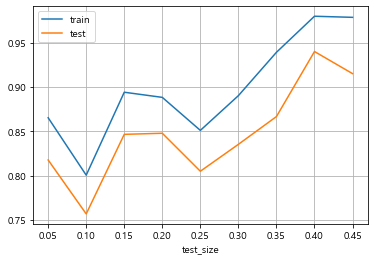

In [353]:
sizes = np.arange(0.05,0.5,0.05)
train_acc = []
test_acc = []
for size in sizes :
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)
  model = DecisionTreeClassifier(max_depth=35,random_state=0).fit(X_train, y_train)
  train_acc.append(model.score(X_train, y_train))
  test_acc.append(model.score(X_test, y_test))
plt.figure() # figsize=(8,6)
plt.plot(sizes, train_acc, label='train')
plt.plot(sizes, test_acc, label='test') 
plt.xticks(sizes)
plt.xlabel("test_size")
plt.legend()
plt.grid()
# optimized index 
opt_idx = 5
print("size :", sizes[opt_idx])
print("train_acc :", train_acc[opt_idx])
print("test_acc :", test_acc[opt_idx])

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = DecisionTreeClassifier(max_depth=35,random_state=0).fit(X_train, y_train)

### 모델만들기

In [355]:
pred=model.predict(X_test)
pred

array([ 416.,   86.,  448.,  419.,  172.,   62.,  708.,  108.,   98.,
        417.,  625.,  657.,  441.,  116., 1158.,  189.,  403., 1398.,
       1090.,  116.,  172.,  495.,  419., 1374.,   94., 1668.,  132.,
        359.,  823.,  209.,  364.,  288.,   94., 1398.,  510.,  419.,
        236., 1804.,  793.,  562., 1145.,  132.,   86.,  284.,  228.,
        313.,  693.,  132., 1524.,   78.,  131.,  284.,  657.,  403.,
        403., 1804.,  800.,  318.,   62.,   60.,  842.,  609.,  419.,
        403.,  730.,  487.,  910.,  345., 1524., 1087.,  957., 1832.,
        521., 1015.,  739., 1158., 1896., 1015., 1162.,  596.,  396.,
        457.,  358.,  507.,  419.,   86.,  419.,  129.,  735., 1896.,
        479.,  359.,  353.,   96.,  609.,  353.,  730.,  419.,  189.,
        713.,  419.,  419.,  733.,  116., 1668.,   78.,  415.,  589.,
        116., 1653.,  410.,  196.,  196.,  430.,  359.,  133.,  108.,
        146.,  159.,  579.,  403.,  509.,  701.,   62.,  548., 1044.,
       2315.,  652.,

In [356]:
#mae_val=sum(abs(y_test-pred))/len(pred)
mae_val=np.mean(abs(y_test-pred))
mae_val

25.242663656884876

In [357]:
#mse_val=sum((y_test-pred)**2)/len(pred)
mse_val=np.sum((y_test-pred)**2)/len(pred)
mse_val

6512.958239277652

In [358]:
#rmse_val=mse_val ** 0.5
rmse_val=np.sqrt(mse_val)
rmse_val

80.7029010586215

### 제출파일 만들기

In [359]:
print(test.shape)
print(X_test.shape)
print(pred.shape)

(1022, 19)
(886, 8)
(886,)


In [360]:
sel=['label_generation_num','label_bus','단지내주차면수','공급유형','총세대수','전용면적','공가수','지역']
X_test=test[sel]
pred=model.predict(X_test)

In [361]:
test['등록차량수'] = pred
test['단지별차량수평균'] = test.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new.head()

,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,label_bus,label_sub,label_generation_num,등록차량수,단지별차량수평균
0,0,C1072,754,아파트,1,1,39.79,116,14.0,8,22830000,189840,0.0,2.0,683.0,0,0,10,652.0,652.0
1,8,C1128,1354,아파트,1,1,39.79,368,9.0,8,22830000,189840,0.0,3.0,1216.0,1,0,16,873.0,873.0
2,17,C1456,619,아파트,3,1,33.40,82,18.0,1,19706000,156200,0.0,16.0,547.0,8,0,8,761.0,761.0
3,26,C1840,593,아파트,11,1,39.57,253,7.0,1,14418000,108130,0.0,3.0,543.0,1,0,15,91.0,91.0
4,30,C1332,1297,아파트,1,1,39.99,282,11.0,8,28598000,203050,0.0,2.0,1112.0,0,0,15,873.0,873.0


In [362]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df.to_csv('0715_tree.csv', index=False)
sub_df.head()

,code,num
0,C1072,652.0
1,C1128,873.0
2,C1456,761.0
3,C1840,91.0
4,C1332,873.0


In [363]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '0715_api_crawler.ipynb',
 '0715_decisiontree_.ipynb',
 '0715_decision_diabetes.ipynb',
 '0715_tree.csv',
 '0715_전처리_decisiontree.ipynb',
 'diabetes.csv']